<a href="https://colab.research.google.com/github/Aditi840/Guvi-Tasks/blob/main/Assignment5_6_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from scipy.stats import linregress
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats
import statsmodels.api as sm
import itertools

# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [3]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [7]:
slope, intercept, r_value, p_value, std_err = linregress(df["Chirps/Second"], df["Ground Temperature"])
equation = (f"Ground Temperature = {slope:2f} * Chirps/Second + {intercept:.2f}")
print(equation)

Ground Temperature = 3.410323 * Chirps/Second + 22.85


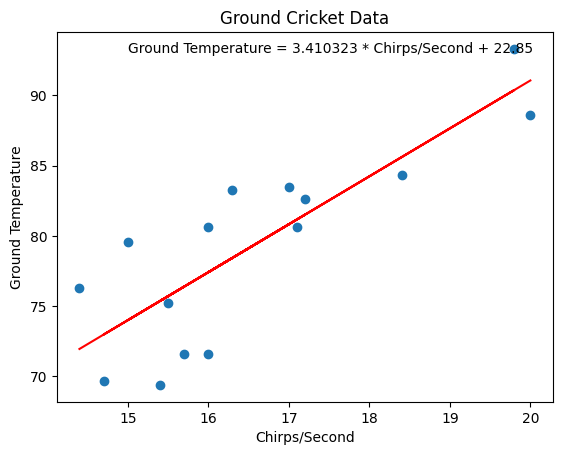

In [8]:
plt.scatter(df["Chirps/Second"], df["Ground Temperature"], label="Data")
plt.plot(df["Chirps/Second"], slope * df["Chirps/Second"] + intercept, color = "red", label = "Regression Line")
plt.xlabel("Chirps/Second")
plt.ylabel("Ground Temperature")
plt.title("Ground Cricket Data")
plt.text(15, 93, equation, fontsize=10)
plt.show()

In [12]:
reg = LinearRegression().fit(df[["Chirps/Second"]], df["Ground Temperature"])
r2_score = reg.score(df[["Chirps/Second"]], df["Ground Temperature"])
print(f"R2 score: {r2_score:.3f}")

R2 score: 0.692


In [17]:
#using equation y = mx+c
#Ground Temperature = 3.4103 * Chirps_Second + 22.843
Chirps_Second = (95 - 22.843) / 3.4103
print(Chirps_Second)

21.15854910125209


In [21]:
#Ground Temperature = 3.4103 * chirps/second + 22.843
Ground_Temperature = (3.4103 * 18) + 22.843
print(Ground_Temperature)

84.2284


### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [86]:
df = pd.read_fwf("brain_body.txt")
df = df.rename(columns={'Brain': 'Brain Weight', 'Body': 'Body Weight'})
print(df)

    Brain Weight  Body Weight
0          3.385         44.5
1          0.480         15.5
2          1.350          8.1
3        465.000        423.0
4         36.330        119.5
..           ...          ...
57       160.000        169.0
58         0.900          2.6
59         1.620         11.4
60         0.104          2.5
61         4.235         50.4

[62 rows x 2 columns]


In [87]:
slope, intercept, r_value, p_value, std_err = linregress(df["Brain Weight"], df["Body Weight"])
equation = (f"Brain Weight = {slope:.2f} * Body Weight + {intercept:.2f}")
print(equation)

Brain Weight = 0.97 * Body Weight + 91.00


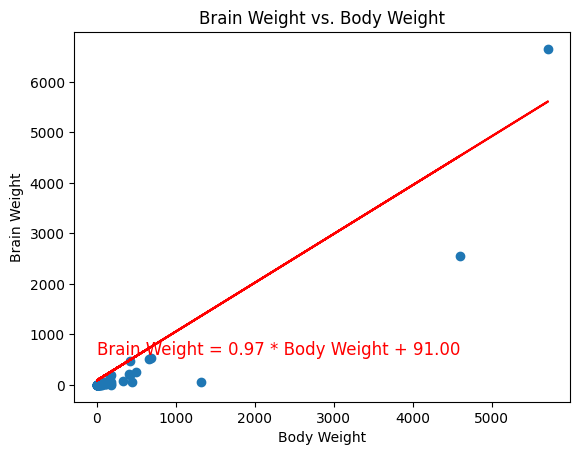

In [88]:
plt.scatter(df["Body Weight"], df["Brain Weight"])
plt.plot(df["Body Weight"], slope * df["Body Weight"] + intercept, color="red")
plt.xlabel("Body Weight")
plt.ylabel("Brain Weight")
plt.title("Brain Weight vs. Body Weight")
plt.text(5, 600, equation, fontsize=12, color="red")
plt.show()

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [90]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [91]:
print(df)

    Sex  Rank  Year  Degree  YSdeg  Salary
0     0     3    25       1     35   36350
1     0     3    13       1     22   35350
2     0     3    10       1     23   28200
3     1     3     7       1     27   26775
4     0     3    19       0     30   33696
5     0     3    16       1     21   28516
6     1     3     0       0     32   24900
7     0     3    16       1     18   31909
8     0     3    13       0     30   31850
9     0     3    13       0     31   32850
10    0     3    12       1     22   27025
11    0     2    15       1     19   24750
12    0     3     9       1     17   28200
13    0     2     9       0     27   23712
14    0     3     9       1     24   25748
15    0     3     7       1     15   29342
16    0     3    13       1     20   31114
17    0     2    11       0     14   24742
18    0     2    10       0     15   22906
19    0     3     6       0     21   24450
20    0     1    16       0     23   19175
21    0     2     8       0     31   20525
22    0    

In [94]:
X = df[["Sex", "Rank", "Year", "Degree", "YSdeg"]]
y = df["Salary"]

# Add a constant to X to represent the intercept term
X = sm.add_constant(X)

# Fit the linear regression model using OLS (ordinary least squares) method
model = sm.OLS(y, X).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     54.13
Date:                Sun, 23 Apr 2023   Prob (F-statistic):           3.86e-18
Time:                        20:12:01   Log-Likelihood:                -474.78
No. Observations:                  52   AIC:                             961.6
Df Residuals:                      46   BIC:                             973.3
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.141e+04   1081.052     10.555      0.0

In [99]:
#Salary = 1.141e+04 + 1241.7925 * Sex + 5586.1814 * Rank + 482.8598 * Year - 1331.6441 * Degree - 128.7906 * YSdeg
col_names = ["Sex", "Rank", "Year", "Degree", "YSdeg"]

# Initialize variables for best R2 score and corresponding column combination
best_r2 = 0
best_cols = None

# Iterate over all possible combinations of columns
for i in range(1, len(col_names) + 1):
    for cols in itertools.combinations(col_names, i):
        # Extract the selected columns and the target variable
        X = df[list(cols)]
        y = df["Salary"]
        
        # Add a constant to X to represent the intercept term
        X = sm.add_constant(X)
        
        # Fit the linear regression model using OLS (ordinary least squares) method
        model = sm.OLS(y, X).fit()
        
        # Calculate R2 score for the model
        r2 = model.rsquared
        
        # Update best R2 score and corresponding column combination if applicable
        if r2 > best_r2:
            best_r2 = r2
            best_cols = cols

# Print the best R2 score and corresponding column combination
print("Best R2 score:", best_r2)
print("Best column combination:", best_cols)

Best R2 score: 0.854718067441097
Best column combination: ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')


In [97]:
# Extract the coefficients and p-values from the model
coeffs = model.params
p_values = model.pvalues

# Print the coefficients and p-values
print("Coefficients:")
print(coeffs)
print("\nP-values:")
print(p_values)

# Test whether the coefficient of Sex is significantly different from 0
alpha = 0.05
sex_coeff = coeffs["Sex"]
sex_pvalue = p_values["Sex"]
if sex_pvalue < alpha:
    print("Sex is a significant factor in salary (p-value = {:.3f})".format(sex_pvalue))
else:
    print("Sex is not a significant factor in salary (p-value = {:.3f})".format(sex_pvalue))


Coefficients:
const     11410.146547
Sex        1241.792500
Rank       5586.181450
Year        482.859768
Degree    -1331.644063
YSdeg      -128.790574
dtype: float64

P-values:
const     7.109796e-14
Sex       1.675479e-01
Rank      7.325034e-11
Year      3.598592e-06
Degree    1.864314e-01
YSdeg     9.512960e-02
dtype: float64
Sex is not a significant factor in salary (p-value = 0.168)
